In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [58]:
df = pd.read_csv('lsu.csv')

In [59]:
df.head()


,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,9/4/22,lsu,N,Florida State,L (23-24),20,33,60.6,260,2,...,5.4,14,8,3,25,4,45,2,0,2
1,9/10/22,lsu,NaN,Southern,W (65-17),9,17,52.9,61,0,...,7.9,13,10,0,23,6,40,0,2,2
2,9/17/22,lsu,NaN,Mississippi State,W (31-16),24,42,57.1,214,1,...,5.6,11,8,1,20,7,39,1,0,1
3,9/24/22,lsu,NaN,New Mexico,W (38-0),4,6,66.7,51,0,...,7.9,16,11,1,28,5,60,1,0,1
4,10/1/22,lsu,@,Auburn,W (21-17),19,39,48.7,337,2,...,3.6,2,14,3,19,10,94,1,0,1


In [60]:
# df['Opponent'].value_counts()

In [61]:
df['team'].value_counts()

ole miss          9
lsu               8
tennessee         8
alabama           8
florida           8
aubrun            8
miss_state        8
kentucky          8
Arkansas          8
texas_am          8
south_carolina    8
missouri          8
Name: team, dtype: int64

In [62]:
df['Opponent'].value_counts()

Texas A&M               5
Mississippi State       5
Arkansas                5
Louisiana State         5
Kentucky                5
Georgia                 4
Auburn                  4
Tennessee               4
Florida                 4
Mississippi             4
Alabama                 4
South Carolina          4
Vanderbilt              3
Missouri                3
Cincinnati              1
Florida State           1
Missouri State          1
Youngstown State        1
Miami (OH)              1
Bowling Green State     1
Northern Illinois       1
Appalachian State       1
Brigham Young           1
Sam Houston State       1
Memphis                 1
Miami (FL)              1
Georgia State           1
Charlotte               1
South Carolina State    1
Louisiana Tech          1
Kansas State            1
Arizona                 1
Troy                    1
Penn State              1
Louisiana-Monroe        1
New Mexico              1
Ball State              1
Pittsburgh              1
Akron       

In [63]:
res = df['results']

In [64]:
lsu_w = []

for i in res:
    if (i[0] == 'L'):
        lsu_w.append(0)
    else: 
        lsu_w.append(1)

In [65]:
df1 = df.copy()

In [66]:
df1['results'] = lsu_w

In [67]:
df1.head()

,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,9/4/22,lsu,N,Florida State,0,20,33,60.6,260,2,...,5.4,14,8,3,25,4,45,2,0,2
1,9/10/22,lsu,NaN,Southern,1,9,17,52.9,61,0,...,7.9,13,10,0,23,6,40,0,2,2
2,9/17/22,lsu,NaN,Mississippi State,1,24,42,57.1,214,1,...,5.6,11,8,1,20,7,39,1,0,1
3,9/24/22,lsu,NaN,New Mexico,1,4,6,66.7,51,0,...,7.9,16,11,1,28,5,60,1,0,1
4,10/1/22,lsu,@,Auburn,1,19,39,48.7,337,2,...,3.6,2,14,3,19,10,94,1,0,1


In [68]:
# home away or neutral site
# home 0
# away 1
# neutral 2
locations = []

for index, row in df.iterrows():
    if(row['location'] == '@'):
        locations.append(1)
    elif(row['location'] == 'N'):
        locations.append(2)
    else:
        locations.append(0)

In [69]:
df1['location'] = locations

In [70]:
df1

,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,9/4/22,lsu,2,Florida State,0,20,33,60.6,260,2,...,5.4,14,8,3,25,4,45,2,0,2
1,9/10/22,lsu,0,Southern,1,9,17,52.9,61,0,...,7.9,13,10,0,23,6,40,0,2,2
2,9/17/22,lsu,0,Mississippi State,1,24,42,57.1,214,1,...,5.6,11,8,1,20,7,39,1,0,1
3,9/24/22,lsu,0,New Mexico,1,4,6,66.7,51,0,...,7.9,16,11,1,28,5,60,1,0,1
4,10/1/22,lsu,1,Auburn,1,19,39,48.7,337,2,...,3.6,2,14,3,19,10,94,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,9/24/22,missouri,1,Auburn,0,14,24,58.3,179,0,...,3.3,7,8,0,15,4,26,0,0,0
93,10/1/22,missouri,0,Georgia,0,20,32,62.5,192,1,...,6.0,15,10,3,28,5,55,2,0,2
94,10/8/22,missouri,1,Florida,0,22,30,73.3,220,0,...,6.4,4,8,1,13,1,5,1,1,2
95,10/22/22,missouri,0,Vanderbilt,1,17,25,68.0,211,1,...,4.1,8,7,1,16,5,35,0,1,1


In [74]:

home_loss = []

for index, row in df1.iterrows():
    if(row['location'] == 0):
        if(row['results'] == 0):
            home_loss.append(row['team'])
            home_loss.append(row['Opponent'])
            
        else:
            continue
    else:
        continue

<AxesSubplot:>

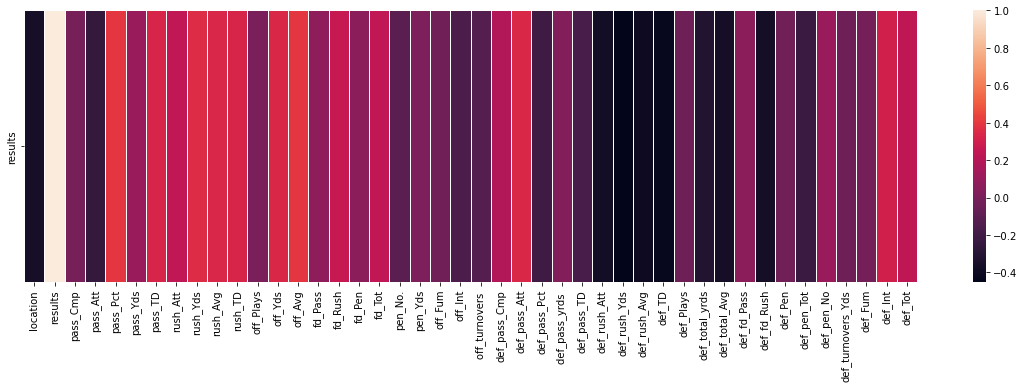

In [15]:
fig, ax = plt.subplots(figsize=(20,5))         
sns.heatmap(df1.corr().loc[['results'],:], linewidth=.9, ax=ax)


In [16]:
df1.corr().loc[['results']]

,location,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
results,-0.364105,1.0,-0.013095,-0.250692,0.39144,0.106137,0.328225,0.236183,0.356592,0.335886,...,-0.371949,0.057846,-0.368061,-0.032716,-0.226797,0.106353,-0.043671,-0.015715,0.300314,0.230604


In [17]:
big_corrs = df1.corr().loc[['results'],:]

In [18]:
# for index, row in big_corrs.iterrows():
#     print((row > .1) | (row < -.3))
       

In [19]:
df1.cov()

,location,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
location,0.329897,-0.100301,-0.070339,0.596542,-1.316957,-2.098905,-0.162371,0.013960,-5.152921,-0.157882,...,0.130659,-0.002792,0.577964,0.058097,0.633269,-0.361899,-1.690614,0.038338,-0.091065,-0.052728
results,-0.100301,0.230026,-0.044566,-1.188037,1.890561,5.037049,0.234751,1.184815,15.036619,0.278920,...,-0.249205,0.115120,-0.756980,-0.027599,-0.669459,0.144115,-0.565507,-0.005369,0.123282,0.117912
pass_Cmp,-0.070339,-0.044566,50.352234,61.648948,33.878082,510.399699,5.548862,-29.671929,-216.833226,-1.993567,...,-0.667526,-1.951031,-7.251181,3.130906,-6.071306,2.630799,20.692440,0.593643,0.526632,1.120275
pass_Att,0.596542,-1.188037,61.648948,97.634450,2.289884,610.170855,5.022552,-49.494416,-400.240335,-4.724195,...,0.254972,-4.571950,-2.637564,4.062822,-3.146692,2.073991,31.038338,1.219502,-0.467676,0.751826
pass_Pct,-1.316957,1.890561,33.878082,2.289884,101.408703,382.403211,6.250623,5.598378,73.191785,1.973534,...,-2.730216,3.908033,-18.832549,1.901289,-13.023228,4.064712,7.641892,-0.238660,2.056379,1.817719
pass_Yds,-2.098905,5.037049,510.399699,610.170855,382.403211,9791.429768,94.537693,-148.437393,-1142.156465,-5.493073,...,-12.606615,22.485395,-66.758054,34.623604,-9.649055,50.832152,447.917204,13.906465,-5.855348,8.051117
pass_TD,-0.162371,0.234751,5.548862,5.022552,6.250623,94.537693,2.223797,-0.074742,20.826568,0.603082,...,-0.443793,-0.168385,-1.738080,0.179983,-1.726482,0.811748,7.449205,0.173432,0.134665,0.308097
rush_Att,0.013960,1.184815,-29.671929,-49.494416,5.598378,-148.437393,-0.074742,109.402921,689.767075,4.872777,...,1.201944,4.765249,-6.489905,-1.425473,-3.150129,2.244953,-5.256229,-0.798325,1.547036,0.748711
rush_Yds,-5.152921,15.036619,-216.833226,-400.240335,73.191785,-1142.156465,20.826568,689.767075,7730.007517,124.517988,...,-3.605971,64.969502,-38.124356,-5.430305,21.414841,17.187178,-33.300043,-3.257517,15.697595,12.440077
rush_Avg,-0.157882,0.278920,-1.993567,-4.724195,1.973534,-5.493073,0.603082,4.872777,124.517988,2.997766,...,-0.293692,1.201278,-0.412446,-0.008602,0.780230,0.080702,-1.123615,0.046596,0.242161,0.288756


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:

# fig, ax = plt.subplots(figsize=(90,90))         
# sns.heatmap(X.cov(), linewidth=.1, ax=ax)


In [22]:
# X_train.columns

In [23]:
df2 = df1.copy()

In [24]:
df2 = df2.drop(columns=['Date', 'team', 'Opponent'])

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           97 non-null     int64  
 1   results            97 non-null     int64  
 2   pass_Cmp           97 non-null     int64  
 3   pass_Att           97 non-null     int64  
 4   pass_Pct           97 non-null     float64
 5   pass_Yds           97 non-null     int64  
 6   pass_TD            97 non-null     int64  
 7   rush_Att           97 non-null     int64  
 8   rush_Yds           97 non-null     int64  
 9   rush_Avg           97 non-null     float64
 10  rush_TD            97 non-null     int64  
 11  off_Plays          97 non-null     int64  
 12  off_Yds            97 non-null     int64  
 13  off_Avg            97 non-null     float64
 14  fd_Pass            97 non-null     int64  
 15  fd_Rush            97 non-null     int64  
 16  fd_Pen             97 non-nu

In [26]:
y = df2['results']
X = df2.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.10, random_state=2)

In [27]:
# X_train = X_train.drop(columns=['def_total_yrds', 'off_Yds'])
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_hat_train = lr2.predict(X_train)
r2_score(y_train, y_hat_train)

0.6072016926710672

In [28]:
column_list = df2.columns

In [29]:
X_train.columns

Index(['location', 'pass_Cmp', 'pass_Att', 'pass_Pct', 'pass_Yds', 'pass_TD',
       'rush_Att', 'rush_Yds', 'rush_Avg', 'rush_TD', 'off_Plays', 'off_Yds',
       'off_Avg', 'fd_Pass', 'fd_Rush', 'fd_Pen', 'fd_Tot', 'pen_No.',
       'pen_Yds', 'off_Fum', 'off_Int', 'off_turnovers ', 'def_pass_Cmp',
       'def_pass_Att', 'def_pass_Pct', 'def_pass_yrds ', 'def_pass_TD',
       'def_rush_Att', 'def_rush_Yds', 'def_rush_Avg', 'def_TD', 'def_Plays',
       'def_total_yrds', 'def_total_Avg', 'def_fd_Pass', 'def_fd_Rush',
       'def_Pen', 'def_pen_Tot', 'def_pen_No', 'def_turnovers_Yds', 'def_Fum',
       'def_Int', 'def_Tot'],
      dtype='object')

In [30]:
from itertools import combinations
columns_list = X.columns
interactions = list(combinations(column_list, 2))

In [31]:
len(interactions)

946

In [32]:
X

,location,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,rush_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,2,20,33,60.6,260,2,38,132,3.5,1,...,5.4,14,8,3,25,4,45,2,0,2
1,0,9,17,52.9,61,0,42,201,4.8,1,...,7.9,13,10,0,23,6,40,0,2,2
2,0,24,42,57.1,214,1,22,75,3.4,1,...,5.6,11,8,1,20,7,39,1,0,1
3,0,4,6,66.7,51,0,27,37,1.4,0,...,7.9,16,11,1,28,5,60,1,0,1
4,1,19,39,48.7,337,2,31,101,3.3,0,...,3.6,2,14,3,19,10,94,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1,14,24,58.3,179,0,39,133,3.4,2,...,3.3,7,8,0,15,4,26,0,0,0
93,0,20,32,62.5,192,1,21,102,4.9,0,...,6.0,15,10,3,28,5,55,2,0,2
94,1,22,30,73.3,220,0,42,150,3.6,2,...,6.4,4,8,1,13,1,5,1,1,2
95,0,17,25,68.0,211,1,40,97,2.4,1,...,4.1,8,7,1,16,5,35,0,1,1


In [33]:
new_interactions = []
for i in interactions:
    if (i[0] == 'results'):
        continue
    elif (i[1] == 'results'):
        continue
    else:
        new_interactions.append(i)

In [34]:
len(new_interactions)

903

In [35]:
interaction_dict = {}

for interaction in new_interactions:
    X_train_int = X
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    lr3 = LinearRegression()
    lr3.fit(X_train_int, y)
    interaction_dict[lr3.score(X_train_int, y)] = interaction

In [36]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('location', 'def_rush_Avg')
('location', 'pen_No.')
('pass_Cmp', 'def_Pen')
('def_total_yrds', 'def_Pen')
('def_Plays', 'def_Pen')


In [37]:
# from df features

In [38]:
X_train_int = X
X_train_int['lo_oen'] = X_train_int['location'] * X_train_int['pen_No.']

In [39]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.6378892576506042

In [40]:
X_train_int = X
X_train_int['cmp_def_pen'] = X_train_int['pass_Cmp'] * X_train_int['def_Pen']

In [41]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.6734554117862992

In [42]:
X_train_int = X
X_train_int['pen_def_rush'] = X_train_int['fd_Pen'] * X_train_int['def_rush_Yds']

In [43]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.6987629778691764

In [44]:
# from  X_train features 

In [45]:
X_train_int = X
X_train_int['lo_def'] = X_train_int['location'] * X_train_int['def_total_Avg']

In [46]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.708716542923256

In [47]:
X_train_int = X
X_train_int['pass_def'] = X_train_int['pass_Pct'] * X_train_int['def_Pen']

In [48]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.711074504077726

In [49]:
X_train_int = X
X_train_int['def_pass_att'] = X_train_int['pass_Pct'] * X_train_int['def_pass_Att']

In [50]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.7111018979329453

In [51]:
X_train_int = X
X_train_int['loc_def_rush'] = X_train_int['location'] * X_train_int['def_rush_Avg']

In [52]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.717744453030206

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly_dict = {}

for feature in X_train_int.columns:
    for p in range(2, 5):
        X_train_poly = X_train_int
        X_train_poly['sq'] = X_train_poly[feature] ** p
        lr = LinearRegression()
        lr.fit(X_train_poly, y)
        poly_dict[lr.score(X_train_poly, y)] = [feature, p]
                  
poly_dict[max(poly_dict.keys())]
                  

['def_rush_Yds', 2]

In [54]:
# poly_dict

In [55]:
# whole df
# 0.7526971321577923: ['def_Fum', 3],

In [56]:
#  0.8325329923245015: ['rush_TD', 4],

X_train = X_train_int
y_train = y_train

need to change the features for the whole df, not just the training sets
